**🚀 Proyek: Analisis Statistik Perilaku Pelanggan E-commerce**

**Tugas Anda adalah menganalisis dataset pelanggan untuk memahami perilaku mereka dan memberikan wawasan berbasis data kepada tim marketing.**

**🎯 Tujuan Proyek**

**Mengaplikasikan konsep statistik deskriptif, korelasi, distribusi probabilitas, dan Teorema Limit Pusat (CLT) untuk menganalisis dan menginterpretasikan data pelanggan.**

---

**Import library**

----

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**LOAD DATASET**

In [94]:
e_commerce_customer_data = pd.read_csv('synthetic_customers.csv')
e_commerce_customer_data.head()

,customer_id,age,gender,annual_income,time_on_site_minutes,items_purchased_monthly,has_subscribed
0,1,56,Wanita,157,85,3,1
1,2,46,Pria,47,151,5,0
2,3,32,Pria,252,145,2,1
3,4,60,Wanita,83,30,4,0
4,5,25,Pria,87,30,2,0


---

## 1: Statistik Deskriptif & Eksplorasi Data (Mengacu pada pdf1.pdf)

**Tujuan tahap ini adalah memahami karakteristik dasar dari dataset menggunakan statistik deskriptif.**

**Gunakan kolom Age dan annual_income**






---


**A. Ukuran Pemusatan Data:**
- Hitung mean, median, dan modus untuk kolom age dan annual_income.
- Apakah ada perbedaan signifikan antara mean dan median pada annual_income? Jika ya, apa artinya bagi distribusi data tersebut? (Lihat materi tentang skewness).


In [95]:
# Menghitung Ukuran pemusatan data
from scipy import stats as st
import statistics 
# menghitung nilai mean, median, modus untuk age dan annual_income
ages = e_commerce_customer_data["age"].values
income = e_commerce_customer_data["annual_income"].values

# age statistics
print("=" * 50)
print("Age Mean :", np.mean(ages).round(2))
print("Age Median :", np.median(ages).round(2))
print("Age Mode :", st.mode(ages, keepdims=True).mode[0])

print("=" * 50)
# annual_income statistics
print("Annual Income Mean :", np.mean(income).round(2))
print("Annual Income Median :", np.median(income).round(2))
print("Annual Income Mode :", statistics.mode(e_commerce_customer_data['annual_income']))



Age Mean : 40.87
Age Median : 41.0
Age Mode : 41
Annual Income Mean : 166.09
Annual Income Median : 164.5
Annual Income Mode : 87


**Perbedaan keduanya sangat signifikan tentu saja ini hal yang wajar mungkin anak aneh apabila kita di minta membandingkan usia dan pendapatan tahunan tentu
saja pendapatan akan selalu lebih besar daripada usia**

**berikut adalah gambaran umum dari keduanya:**
- Age -> dalam hal ini baik mean median dan mode nilainya hampir sama ini berarti distribuai usia relatif normal atau simetris(tidak skew)
- Annual_income -> sementara untuk bagian ini yang mana mean lebih besar dari median dan mode. ini artinya distribusi miring ke kanan(right skewed).
bisa terjadi kemungkinan ada sebagian kecil pelanggan memiliki pendapatan lebih tinggi dari mayoritas, berakibat terjadinya outlier di sisi kanan yang
menarik mean/rata-rata jadi lebih besar, serta perbadingan angka mayoritas mode lebih kcil daripada rata-rata.

**Kesimpulan**
- Age -> distribusi seimbang
- annula_income = distribusi miring ke kanan (right skew)

---


**B. Ukuran Sebaran Data:**
- Hitung variance, standard deviation, dan Interquartile Range (IQR) untuk kolom annual_income.
- Manakah ukuran yang lebih baik untuk mendeskripsikan sebaran data pendapatan yang mungkin skewed? Jelaskan mengapa.


In [96]:
# mwenghitung varaince dan standar deviation untuk menghitung sebaran data DAN IQR untuk mengukur 50% sebaran data tengah

print("Annual Income variance", np.var(e_commerce_customer_data['annual_income'], ddof=1).round(2))
print("Annual Income Standar Deviation", np.std(e_commerce_customer_data['annual_income'], ddof=1).round(2))

#IQR
print("IQR Annual Income", np.quantile(e_commerce_customer_data['annual_income'], 0.75) - np.quantile(e_commerce_customer_data['annual_income'], 0.25))

#

Annual Income variance 5809.64
Annual Income Standar Deviation 76.22
IQR Annual Income 116.75


---

**Kesimpulan**

**distribusi Annual Income cenderung skewed (miring), maka IQR lebih tepat digunakan untuk mendeskripsikan sebaran data karena:**
- Tidak terpengaruh outlier,
- Lebih mewakili kondisi mayoritas data.

**Namun, standar deviasi/varian tetap berguna bila analisis yang dilakukan membutuhkan dasar perhitungan matematis (misalnya uji statistik atau model regresi). dari kasus ini kita hanya mendeskripsikan sebaran data yang mungkin skewed maka IQR lebih cocok untuk ini**

---

**C. Visualisasi & Outlier:**
- Buat histogram untuk age dan annual_income. Amati bentuk distribusinya (simetris, left-skewed, atau right-skewed).
- Buat boxplot untuk annual_income untuk mengidentifikasi adanya outlier. Hitung batas atas dan bawah menggunakan metode Q3+1.5×IQR dan Q1−1.5×IQR.



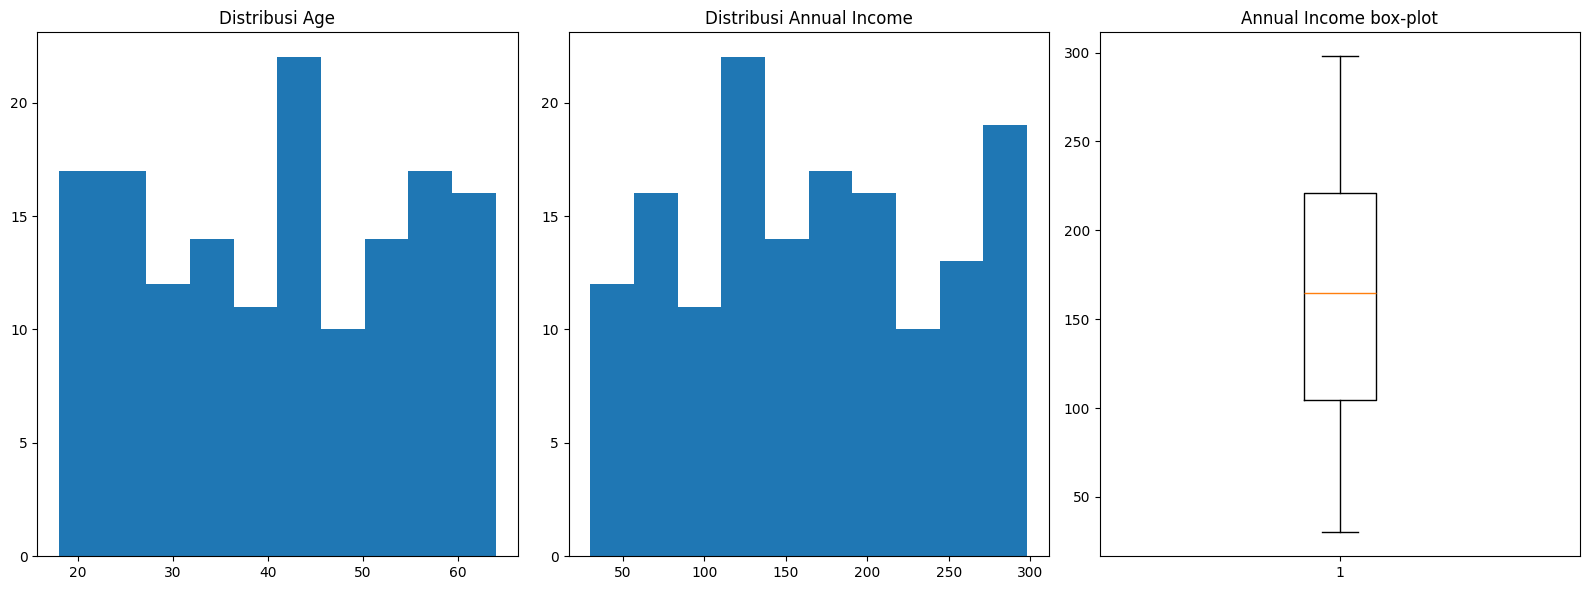

Empty DataFrame
Columns: [customer_id, age, gender, annual_income, time_on_site_minutes, items_purchased_monthly, has_subscribed]
Index: []


In [97]:
# histogram age dan annual_income
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Age
ax[0].hist(e_commerce_customer_data['age'])
ax[0].set_title("Distribusi Age")

# Annual_income
ax[1].hist(e_commerce_customer_data['annual_income'])
ax[1].set_title("Distribusi Annual Income")


ax[2].boxplot(e_commerce_customer_data['annual_income'])
ax[2].set_title("Annual Income box-plot")

plt.tight_layout()
plt.show()


#finding outlier
from scipy.stats import iqr 
iqr = iqr(e_commerce_customer_data['annual_income'])

lower_threshold = np.quantile(e_commerce_customer_data['annual_income'], 0.25) - 1.5 * iqr 
upper_threshold = np.quantile(e_commerce_customer_data['annual_income'], 0.75) + 1.5 * iqr 
print(e_commerce_customer_data[(e_commerce_customer_data['annual_income'] < lower_threshold) | (e_commerce_customer_data['annual_income'] > upper_threshold)])

- distribusi age cenderung normal di tengah lebih tinggi
- distribusi annual_income lebih tinggi sebagian kiri artinya right skewed disebabkan karena mode < median < mean dalam perhitungan sebelumnya
- tidak di temukan outliers

---

## 2: Analisis Hubungan & Korelasi (Mengacu pada pdf4.pdf)
**mencari tahu lebih dalam hubungan antar variabel**

---

**A. Visualisasi Hubungan:**
- Buat scatterplot untuk melihat hubungan antara time_on_site_minutes dan items_purchased_monthly. Apakah Anda melihat adanya tren?
- Buat scatterplot lain untuk annual_income dan items_purchased_monthly.

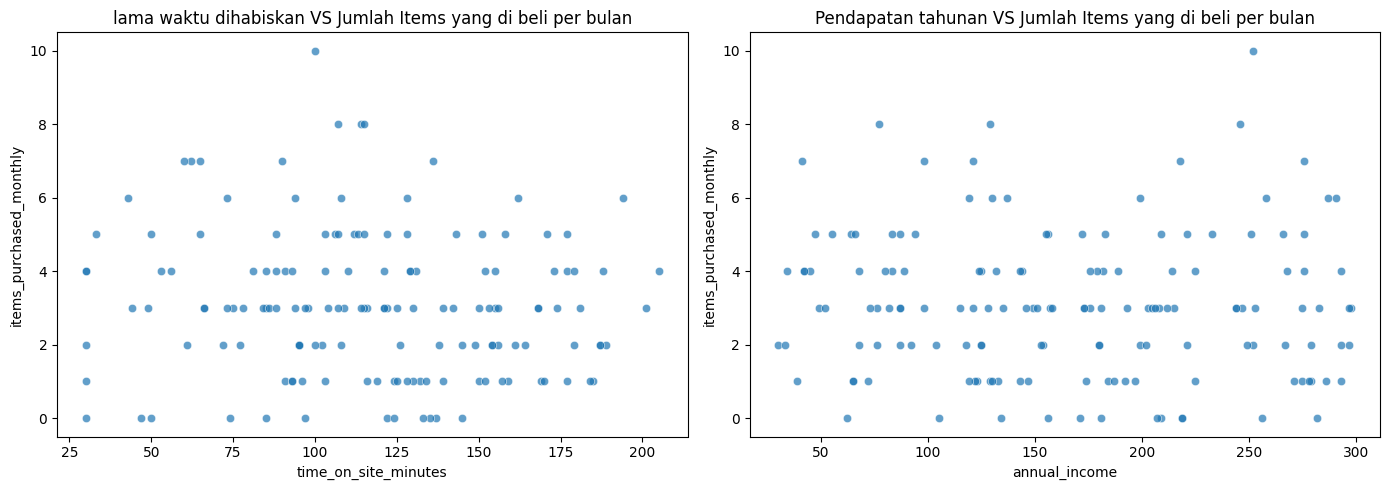

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# korelasi time on site minutes vs items purcashed mothly
sns.scatterplot(data=e_commerce_customer_data,
                x='time_on_site_minutes', y='items_purchased_monthly', alpha=0.7, ax=ax[0])
ax[0].set_title('lama waktu dihabiskan VS Jumlah Items yang di beli per bulan')


# korelasi pendapatan vs jumlah items yang dibeli
sns.scatterplot(data=e_commerce_customer_data, x='annual_income', y='items_purchased_monthly', alpha=0.7, ax=ax[1])
ax[1].set_title('Pendapatan tahunan VS Jumlah Items yang di beli per bulan')

plt.tight_layout()  # supaya judul & label nggak saling menempel
plt.show()

**Keduanya negatif tidak ada tren dan hampir tidak ada sangat lemah**

---

**B. Mengukur Kekuatan Hubungan:**

**Hitung** 

- koefisien korelasi Pearson (r) antara annual_income dan items_purchased_monthly. 
- Interpretasikan hasilnya. Seberapa kuat hubungannya dan ke arah mana (positif atau negatif)? 

In [99]:
# 1
print("Total nilai korelasi",e_commerce_customer_data['time_on_site_minutes'].corr(e_commerce_customer_data['items_purchased_monthly']).round(5))

#2
print("Total nilai korelasi", e_commerce_customer_data['annual_income'].corr(e_commerce_customer_data['items_purchased_monthly']).round(5))

Total nilai korelasi -0.10494
Total nilai korelasi -0.04202


**negatif mendekati nol hampir tidak ada**

---
**C. Korelasi Bukan Kausalitas:**
- Jika Anda menemukan korelasi yang kuat antara pendapatan dan jumlah item yang dibeli, apakah ini berarti pendapatan yang lebih tinggi menyebabkan orang membeli lebih banyak? -Jelaskan jawabanmu dan sebutkan satu kemungkinan variabel perancu (confounding variable). 

**tentu tidak dalam korelasi tidak selalu berarti sebab akibat bisa jadi ada variabel perancu, bisa jadi usia menjadi variable perancu dimana orang dewasa muda mungkin saja punya pendapatan lebih tinggi dan juga lebih aktif berbelanja**

---

**D. Transformasi Data:**
- Karena annual_income kemungkinan besar right-skewed, lakukan transformasi log pada kolom ini dan buat kembali scatterplot dengan items_purchased_monthly. Apakah hubungannya terlihat lebih linear? 

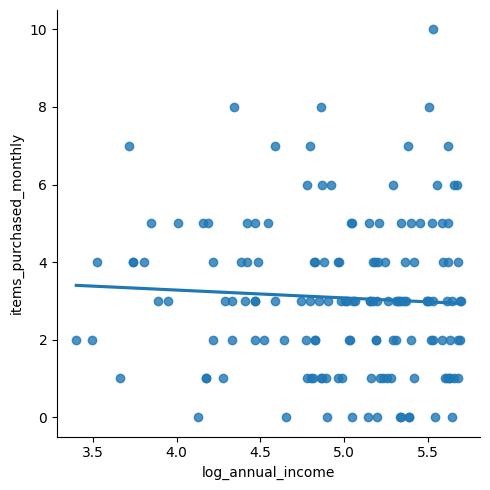

nilai Korelasi -0.057707926424962266


In [107]:
# Log Transformation mengurangi skewness / membuat distribusi lebih normal.
a = e_commerce_customer_data['log_annual_income'] = np.log(e_commerce_customer_data['annual_income'])

# a.hist()
# plt.show()

sns.lmplot(x='log_annual_income',            
           y='items_purchased_monthly',            
           data=e_commerce_customer_data,            
           ci=None) 

plt.show() 


print("nilai Korelasi", e_commerce_customer_data['log_annual_income'].corr(e_commerce_customer_data['items_purchased_monthly']))

**tetap negatif dibagian korelasi adapun distibusinya menjadi left-skewed, ini dipengaruhi dari dataset kemungkinan**

---

## 3: Menerapkan Distribusi Probabilitas (Mengacu pada pdf2.pdf & pdf3.pdf)

**menggunakan pengetahuan yang sudah dipelajari tentang distribusi probabilitas untuk memodelkan dan menjawab pertanyaan bisnis.**

---

**A. Distribusi Normal:**
- Asumsikan time_on_site_minutes terdistribusi normal dengan mean 35 menit dan standar deviasi 5 menit.
- Berapa probabilitas seorang pelanggan menghabiskan waktu kurang dari 30 menit di situs? (Gunakan norm.cdf). 
- Berapa probabilitas seorang pelanggan menghabiskan waktu lebih dari 42 menit? (Gunakan 1 - norm.cdf). 

---
**B. Distribusi Binomial:**
- Tim marketing melaporkan bahwa probabilitas seorang pengunjung baru untuk berlangganan newsletter (has_subscribed) adalah 20% (p=0.2).
- Jika ada 50 pengunjung baru hari ini (n=50), berapa probabilitas tepat 10 orang akan berlangganan? (Gunakan binom.pmf). 
- Berapa probabilitas paling banyak 5 orang akan berlangganan? (Gunakan binom.cdf).

---

**C. Distribusi Poisson:**
- Data historis menunjukkan bahwa rata-rata item yang dibeli per pelanggan per bulan (items_purchased_monthly) adalah 8 item (λ=8).
- Berapa probabilitas seorang pelanggan membeli tepat 5 item bulan depan? (Gunakan poisson.pmf). 
- Berapa probabilitas seorang pelanggan membeli lebih dari 12 item? (Gunakan 1 - poisson.cdf).

---
## 4: Demonstrasi Teorema Limit Pusat (CLT) (Mengacu pada pdf3.pdf)

**Buktikan salah satu teorema paling penting dalam statistik menggunakan data Anda**

----

**A. Pilih Distribusi Asli:** 
- Gunakan data annual_income yang distribusinya tidak normal (skewed).

---

**B. Lakukan Sampling:**

- Ambil 1000 sampel acak dari kolom annual_income, di mana setiap sampel berukuran 50 (n=50).
- Hitung rata-rata (mean) dari setiap sampel tersebut.
- Simpan 1000 nilai rata-rata sampel ini dalam sebuah list.

---

**C. Visualisasikan Hasil:**

- Buat histogram dari 1000 rata-rata sampel yang telah Anda kumpulkan.
- Amati bentuk distribusinya. Apakah sekarang terlihat seperti distribusi normal? Fenomena inilah yang dijelaskan oleh Central Limit Theorem. 



----

## 🏆 Bonus: Rancangan Eksperimen

**Tim marketing ingin menguji apakah skema diskon baru dapat meningkatkan jumlah item yang dibeli.**

1. Jelaskan secara singkat bagaimana Anda akan merancang eksperimen terkontrol acak (randomized controlled trial) atau A/B test untuk menguji hipotesis ini.

2. Sebutkan apa yang akan menjadi grup perlakuan (treatment group) dan grup kontrol (control group) Anda. 

3. Mengapa randomisasi penting dalam eksperimen ini? 